In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from torchvision import datasets
from torchvision import transforms
from torchvision import utils


dataset = datasets.MNIST(".",download=True,train=True, transform = transforms.ToTensor())

###Q1

In [ ]:
dataset = [dataset[i] for i in range(16)]
opp_dataset = [-dataset[i][0] for i in range(16)]

###Q2

In [ ]:
import torch.nn
mpooling = torch.nn.MaxPool2d(3)
avgPooling = torch.nn.AvgPool2d(3)

In [ ]:
mp_outputs  = [mpooling(input) for input, cat in dataset]
avgp_outputs = [avgPooling(input) for input, cat in dataset]
minp_outputs = [mpooling(input) for input in opp_dataset]
normal = [dataset[i][0] for i in range(16)]

###Q3

In [ ]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

from torchvision.utils import make_grid


Lesimages initiales


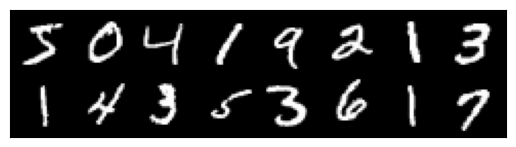

In [ ]:
grid = make_grid(normal)
print("Lesimages initiales")

show(grid)

Après max pooling


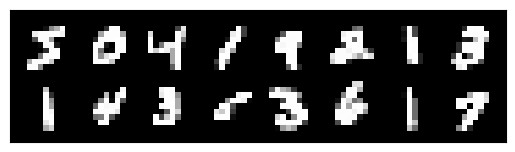

In [ ]:
grid = make_grid(mp_outputs)
print("Après max pooling")
show(grid)

Après average pooling


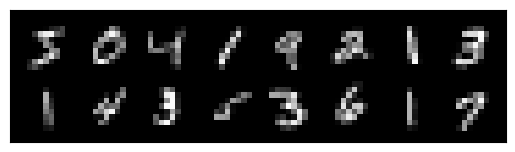

In [ ]:
grid = make_grid(avgp_outputs)
print("Après average pooling")

show(grid)

Après min pooling


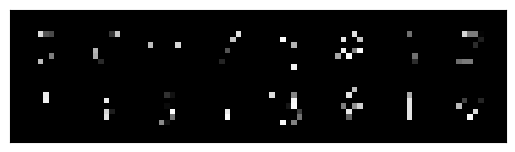

In [ ]:
grid = make_grid(minp_outputs)
print("Après min pooling")

show(grid)

## Premières architectures de CNN

###Q4

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def trainer(dataset, model, loss_fn, epoch = 5, batch_size = 1, rate = 1e-3):
  optimizer = torch.optim.Adam(model.parameters(), lr=rate)
  dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size, shuffle = True)

  for i in tqdm(range(epoch)):
    for i, (input,target) in enumerate(dataloader):
      y_pred = model(input)

      loss = loss_fn(y_pred, target)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

#### Préparation données

In [ ]:
train = datasets.FashionMNIST(".",download=True,train=True, transform = transforms.ToTensor())
test = datasets.FashionMNIST(".",download=True,train=False,transform = transforms.ToTensor())

In [ ]:
def success_rate2(model,test_data):
  nb = 0
  success = 0
  dataloader = torch.utils.data.DataLoader(test_data, batch_size = 1, shuffle = True)
  for i, (input, target) in enumerate(dataloader):
    with torch.no_grad():
      y_pred = model(input)
    if int(torch.argmax(y_pred)) == target:
        success +=1
    nb += 1
  return success / nb

#### Modèle

In [ ]:
batch_size = 64
kernel = 5
profondeur = 4


In [ ]:
class CNNNetwork(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Conv2d(1,profondeur,kernel, padding = (kernel-1)//2)
    self.MaxPool = torch.nn.MaxPool2d(2)
    self.layer3 = torch.nn.Conv2d(profondeur,2*profondeur,kernel, padding = (kernel-1)//2)
    self.layer5 = torch.nn.Conv2d(2*profondeur,4*profondeur,kernel, padding = (kernel-1)//2)
    self.layer6 = torch.nn.Linear(784,10)
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.layer1(x)
    result = self.MaxPool(result)
    result = self.layer3(result)
    result = self.MaxPool(result)
    result = self.layer5(result)
    result = result.view(result.shape[0], 784)
    result = self.layer6(result)
    result = self.soft(result)
    return result

In [ ]:
model_q4 = CNNNetwork()

In [ ]:
trainer(train, model_q4, torch.nn.CrossEntropyLoss(), batch_size = batch_size)
success_rate2(model_q4, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-106-5780d29794f7>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.8746

##Q.5 - Q.6

In [ ]:
batch_size = 64
kernel = 5
profondeur = 2

class CNNNetwork(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Conv2d(1,profondeur,kernel, padding = (kernel-1)//2)
    self.MaxPool = torch.nn.MaxPool2d(2)
    self.layer3 = torch.nn.Conv2d(profondeur,2*profondeur,kernel, padding = (kernel-1)//2)
    self.layer5 = torch.nn.Conv2d(2*profondeur,4*profondeur,kernel, padding = (kernel-1)//2)
    self.layer6 = torch.nn.Linear(784//2,10)
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.layer1(x)
    result = self.MaxPool(result)
    result = self.layer3(result)
    result = self.MaxPool(result)
    result = self.layer5(result)
    result = result.view(result.shape[0], 784//2)
    result = self.layer6(result)
    result = self.soft(result)
    return result

model_q5 = CNNNetwork()

In [ ]:
#Question 5:
trainer(train, model_q5, torch.nn.CrossEntropyLoss(), batch_size = batch_size)
success_rate2(model_q5, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-109-233b927e5e72>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.8478

Q.5

Il faut adapter les dimensions des tenseurs car il y a moins de paramètres en sortie. Il y a moins de paramètre à stocker pour la dernière couche et également pour les filtres mais on remarque une baisse de performance.

In [ ]:
batch_size = 64
kernel = 3
profondeur = 4

class CNNNetwork(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Conv2d(1,profondeur,kernel, padding = (kernel-1)//2)
    self.MaxPool = torch.nn.MaxPool2d(2)
    self.layer3 = torch.nn.Conv2d(profondeur,2*profondeur,kernel, padding = (kernel-1)//2)
    self.layer5 = torch.nn.Conv2d(2*profondeur,4*profondeur,kernel, padding = (kernel-1)//2)
    self.layer6 = torch.nn.Linear(784,10)
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.layer1(x)
    result = self.MaxPool(result)
    result = self.layer3(result)
    result = self.MaxPool(result)
    result = self.layer5(result)
    result = result.view(result.shape[0], 784)
    result = self.layer6(result)
    result = self.soft(result)
    return result


model_q6 = CNNNetwork()

In [ ]:
#Question 6
trainer(train, model_q6, torch.nn.CrossEntropyLoss(), batch_size = batch_size)
success_rate2(model_q6, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-111-9faede0dc894>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.8612

Q.6

Comme pour la question précédente, il y a une baisse de performance mais également moins de paramètres à stocker pour chacun des filtres.

###Q7

In [ ]:
(5*5+1)*4 + (4*5*5+1)*2 + (8*5*5+1)*2 + 785

1493

In [ ]:
(5*5*1+1)*4 + 4*28*28 +1

3241

Premier modèle : (5x5 + 1) x 4 + (4x5x5 + 1) x 8/4 + (8x5x5 + 1) x 16/8 + 785 = 1493

Deuxième modèle : (5x5x1+1)x4 + 4x28x28 + 1 = 3241


###Q8

In [ ]:
class NetworkQ8(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Conv2d(1,4,5, padding = 2)
    self.layer2 = torch.nn.Linear(4*28*28,10)
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.layer1(x)
    result = result.view(result.shape[0], 4*28*28)
    result = self.layer2(result)
    result = self.soft(result)
    return result

In [ ]:
model_q8 = NetworkQ8()

In [ ]:
trainer(train, model_q8, torch.nn.CrossEntropyLoss(), batch_size = batch_size)
success_rate2(model_q8, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-115-6be7c669c1df>:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.8398

## Le Net

###Q9

In [ ]:
class LeNet(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(1,6,5, padding = 2)
    self.pooling = torch.nn.AvgPool2d(2)
    self.conv2 = torch.nn.Conv2d(6,16,5)
    self.linear1 = torch.nn.Linear(16*5*5,120)
    self.linear2 = torch.nn.Linear(120,84)
    self.linear3 = torch.nn.Linear(84,10)
    self.m = torch.nn.ReLU()
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.conv1(x)
    result = self.pooling(result)
    result = self.conv2(result)
    result = self.pooling(result)
    result = result.view(result.shape[0], 16*5*5)
    result = self.linear1(result)
    result = self.m(result)
    result = self.linear2(result)
    result = self.m(result)
    result = self.linear3(result)
    result = self.soft(result)
    return result

In [ ]:
train = datasets.FashionMNIST(".",download=True,train=True, transform = transforms.ToTensor())
test = datasets.FashionMNIST(".",download=True,train=False,transform = transforms.ToTensor())

In [ ]:
model_lenet = LeNet()

In [ ]:
batch_size = 64
trainer(train, model_lenet, torch.nn.CrossEntropyLoss(),epoch = 5, batch_size = batch_size)
success_rate2(model_lenet, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-118-8bb1d3a65742>:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.871

###Q10

In [ ]:

  import torchvision.models as models
  # load pretrained model
  alexnet = models.alexnet(pretrained=True)
  # access weights from first layer
  filter = alexnet.features[0].weight.data
  # normalize to [0, 1]
  filter = (1/(2*filter.max()))*filter + 0.5
  print(filter.shape)
  filter

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([64, 3, 11, 11])


tensor([[[[0.5634, 0.5503, 0.5510,  ..., 0.5298, 0.5115, 0.5267],
          [0.5400, 0.5208, 0.5283,  ..., 0.5137, 0.4940, 0.5022],
          [0.5403, 0.5207, 0.5294,  ..., 0.5233, 0.5055, 0.5071],
          ...,
          [0.5498, 0.5554, 0.5361,  ..., 0.3916, 0.4314, 0.4400],
          [0.5233, 0.5347, 0.5193,  ..., 0.3918, 0.4392, 0.4427],
          [0.5253, 0.5334, 0.5132,  ..., 0.4367, 0.4489, 0.4552]],

         [[0.4612, 0.4690, 0.4569,  ..., 0.4997, 0.4865, 0.5136],
          [0.4631, 0.4639, 0.4592,  ..., 0.4979, 0.4837, 0.5056],
          [0.4468, 0.4542, 0.4438,  ..., 0.4858, 0.4878, 0.5036],
          ...,
          [0.4192, 0.4526, 0.4483,  ..., 0.6649, 0.5967, 0.5451],
          [0.4235, 0.4595, 0.4614,  ..., 0.6091, 0.5879, 0.5509],
          [0.4541, 0.4785, 0.4725,  ..., 0.5874, 0.5792, 0.5545]],

         [[0.4874, 0.4989, 0.4852,  ..., 0.5213, 0.4962, 0.5172],
          [0.5001, 0.5120, 0.5048,  ..., 0.5100, 0.4924, 0.5098],
          [0.5029, 0.5157, 0.5002,  ..., 0

Globalement les paramètres sont répartis de façon normale autour de 0.5.

###Q11

In [ ]:
batch_size = 64
kernel = 5
profondeur = 4

class CNNNetwork_final(torch.nn.Module): # a class inheriting from nn.Module

  def __init__(self):
    super().__init__()
    self.layer1 = torch.nn.Conv2d(1,profondeur,kernel, padding = (kernel-1)//2)
    self.MaxPool = torch.nn.MaxPool2d(2)
    self.layer3 = torch.nn.Conv2d(profondeur,2*profondeur,kernel, padding = (kernel-1)//2)
    self.layer5 = torch.nn.Conv2d(2*profondeur,4*profondeur,kernel, padding = (kernel-1)//2)
    self.layer6 = torch.nn.Linear(784,256)
    self.layer7 = torch.nn.Linear(256,10)
    self.soft = torch.nn.LogSoftmax()

  def forward(self,x):
    result = self.layer1(x)
    result = self.MaxPool(result)
    result = self.layer3(result)
    result = self.MaxPool(result)
    result = self.layer5(result)
    result = result.view(result.shape[0], 784)
    result = self.layer6(result)
    result = self.layer7(result)
    result = self.soft(result)
    return result

In [ ]:
model_final = CNNNetwork_final()

In [ ]:
trainer(train, model_final, torch.nn.CrossEntropyLoss(), batch_size = batch_size)
success_rate2(model_final, test)

  0%|          | 0/5 [00:00<?, ?it/s]

<ipython-input-123-7b7a6446da66>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  result = self.soft(result)


0.8735

In [ ]:
import cloudpickle as pickle
from google.colab import files

def torch_saver(net,file="temp"):
  with open(file,'wb') as f:
    pickle.dump(net,f)
    files.download(file)

In [ ]:
torch_saver(model_final)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>